### IDs:
Insert yours IDs to the cell below

ID #1: 204057558

ID #2: 204244255


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import math
from scipy.stats import nbinom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [2]:
def one_sample_or_more(probability=0.85, defective_precent=0.03):

    my_probability = 1
    non_defective = 1 - defective_precent
    non_defective_probability = 1 - probability
    counter = 0
    
    while my_probability > non_defective_probability:
        
        counter += 1
        my_probability *= non_defective
        print(my_probability)
    
    return counter
        
        
result = one_sample_or_more(probability=0.85, defective_precent=0.03)
print(str(result) + ' independent samples should be taken in order to have an 85% probability of having at least one defective product in the batch')

0.97
0.9409
0.912673
0.8852928099999999
0.8587340256999999
0.8329720049289999
0.8079828447811299
0.783743359437696
0.7602310586545651
0.7374241268949281
0.7153014030880802
0.6938423609954378
0.6730270901655747
0.6528362774606075
0.6332511891367892
0.6142536534626856
0.595826043858805
0.5779512625430409
0.5606127246667496
0.5437943429267471
0.5274805126389447
0.5116560972597763
0.496306414341983
0.48141722191172354
0.4669747052543718
0.4529654640967406
0.4393765001738384
0.42619520516862325
0.4134093490135645
0.4010070685431576
0.38897685648686287
0.377307550792257
0.36598832426848926
0.35500867454043455
0.3443584143042215
0.3340276618750948
0.32400683201884195
0.3142866270582767
0.3048580282465284
0.2957122873991326
0.2868409187771586
0.27823569121384384
0.2698886204774285
0.26179196186310566
0.2539382030072125
0.2463200569169961
0.23893045520948622
0.23176254155320164
0.2248096653066056
0.21806537534740741
0.2115234140869852
0.20517771166437562
0.19902238031444436
0.19305170890501103


In [4]:
## for debuging the result! set debug = True
debug = True

In [5]:
## check the result
def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

def checking_qa1_result(number_of_product, defective_precent=0.03):

    total_precent = 0
    undefective_precent = 1 - defective_precent

    for i in range(1, number_of_product + 1):

        temp_precent = binom(number_of_product, i) * pow(defective_precent, i) * pow(undefective_precent, number_of_product - i)
        total_precent += temp_precent
        
    return total_precent
    
if debug:
    
    print(checking_qa1_result(result))
    print('Result provides probability over 85%: ' + str(checking_qa1_result(result) >= 0.85) )

0.8532360949640688
Result provides probability over 85%: True


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [6]:
result = one_sample_or_more(probability=0.95, defective_precent=0.04)
print(str(result) + ' independent samples should be taken in order to have an 95% probability of having at least one defective product in the batch, with 4% defective')


74 independent samples should be taken in order to have an 95% probability of having at least one defective product in the batch, with 4% defective


In [7]:
if debug:
    
    print(checking_qa1_result(result, defective_precent=0.04))
    print('Result provides probability over 95%: ' + str(checking_qa1_result(result, defective_precent=0.04) >= 0.95) )

0.9512391525501629
Result provides probability over 95%: True


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [8]:
def negative_binomial_disterbution(n, k, p):
    q = 1 - p
    p = binom(n, k) * pow(p, k) * pow(q, n - k)
    return p
    

def get_number_of_product_in_batch(defective_precent, number_of_defective_needed, needed_probability):
    
    probability = 0
    number_of_product = number_of_defective_needed
    
    while probability < needed_probability:
        
        number_of_product += 1
        probability = 0
        
        for i in range(number_of_defective_needed, number_of_product + 1):
        
            probability += negative_binomial_disterbution(number_of_product, i, defective_precent)
        
    
    return number_of_product


c1_1 = get_number_of_product_in_batch(0.1, 5, 0.9)
c1_2 = get_number_of_product_in_batch(0.3, 15, 0.9)

print("Independent samples for C1.1: ", c1_1)
print("Independent samples for C1.2: ", c1_2)

Independent samples for C1.1:  78
Independent samples for C1.2:  64


## Explanation for 1C:
As you see in the graph below, the curves of the two distributions are different. The 90% propability we are looking for represents 90% of the area under each graphs (starting from left to right). This  falls on a different x value per graph. While the second scenario's CDF returns positive value earlier on in the x-axis, the first scenario will reach 90% coverage earlier along the x-axis, the x-axis being the number of samples. This translates to the first scenario needing less samples compared to the second scenario to reach the desired outcome. If we would search for a 50% probability, instead of 90%, the second scenario would require less samples per batch than the first. This is also due to the shape of the distributions; the second scenario having reached its 50% area coverage before the first scenario reaches 50% coverage.The first scenario distribution is denser around the middle and has less of a tail on either ends, this means that most of its non-zero PDF values occur in the middle ranges for number of samples ber batch. 

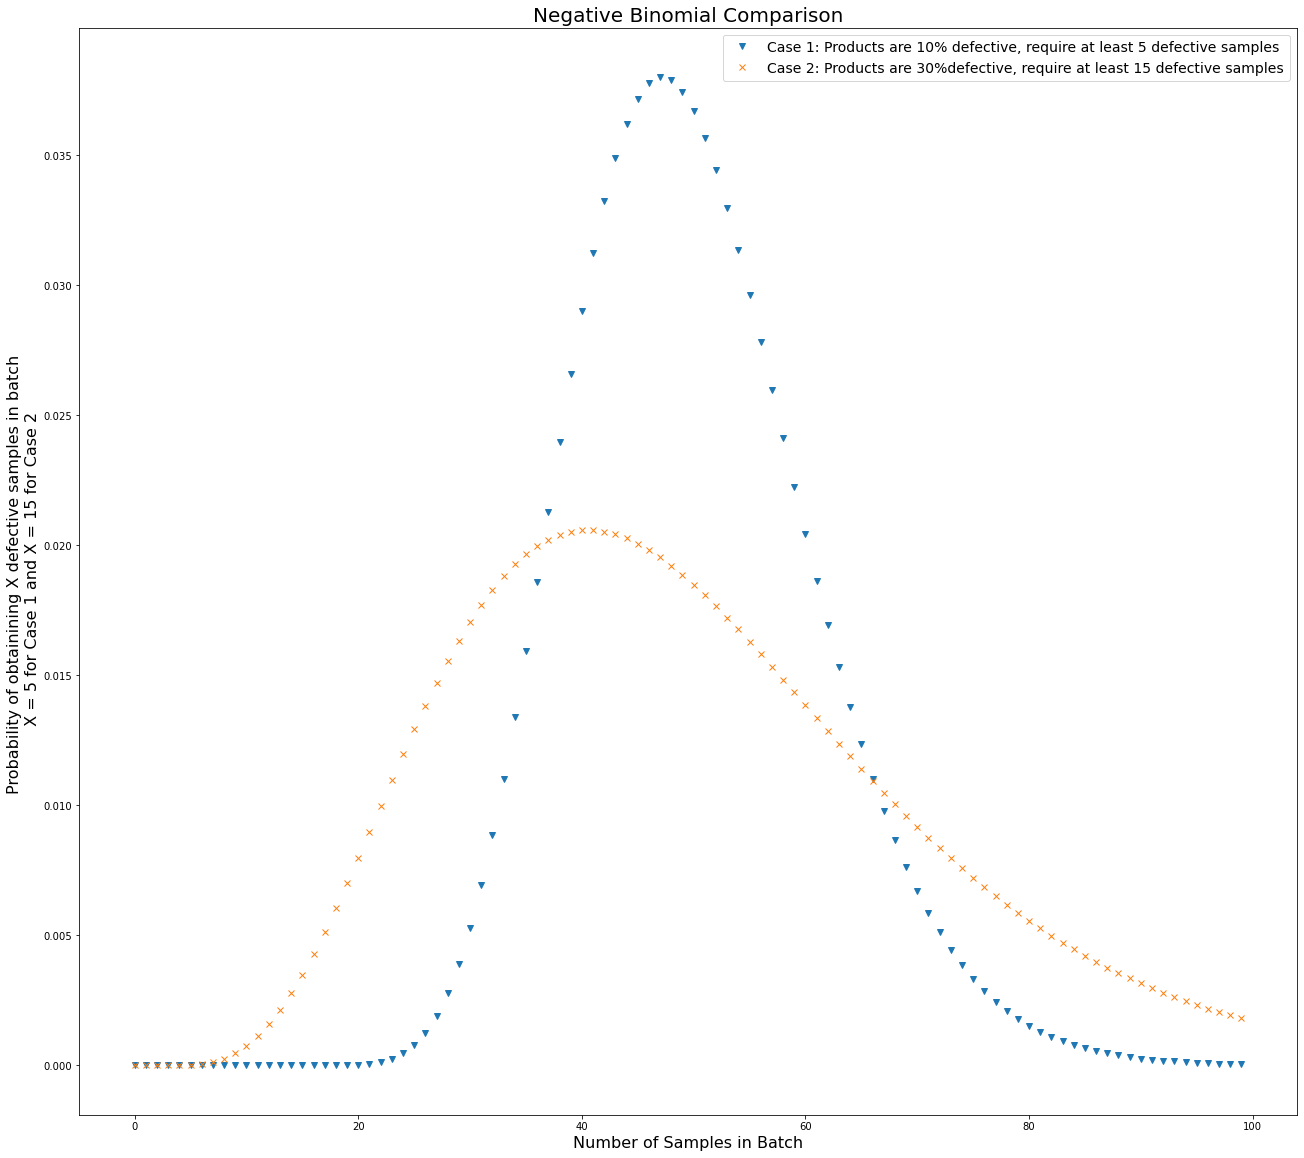

In [9]:
n_1 = 5
p_1 = 0.1
sampels_1 = nbinom(n_1, p_1, loc=n_1)

n_2 =15
p_2 = 0.3
sampels_2 = nbinom(n_2, p_2, loc=n_2)

i = range(0,int(np.round(2*n_2/p_2,0)))

p_X_i = sampels_1.pmf([xx for xx in i])
p_Y_i = sampels_2.pmf([xx for xx in i])

plt.figure(figsize=(48,20))
plt.subplot(1,2,1)
plt.plot(i,p_Y_i,'v',label="$Y\sim NB({{{0}}},{{{1}}})$".format(n_2,p_2))
plt.plot(i,p_X_i,'x',label="$X\sim NB({{{0}}},{{{1}}})$".format(n_1,p_1))
plt.xlabel('Number of Samples in Batch',fontsize=16)
plt.ylabel('Probability of obtainining X defective samples in batch \n X = 5 for Case 1 and X = 15 for Case 2',fontsize=16)
plt.legend(('Case 1: Products are 10% defective, require at least 5 defective samples', 'Case 2: Products are 30%defective, require at least 15 defective samples'),fontsize=14)
plt.title("Negative Binomial Comparison", fontsize=20)

plt.show()

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [14]:
sh_population = 16000
rg_population = 22000

sh_mean_rate = 6300
rg_mean_rate = 4200

median_rent = 4600


def IQR(arr):
    q3, q1 = np.percentile(arr, [75, 25])
    return q3 - q1


def check_if_disterbution_is_fine(sh, rg):
    if len(sh) != sh_population:
        return False

    if len(rg) != rg_population:
        return False

    if sum(sh) / len(sh) != sh_mean_rate:
        return False

    if sum(rg) / len(rg) != rg_mean_rate:
        return False

    sh = sorted(sh)
    rg = sorted(rg)

    if sh[sh_population // 2] != median_rent or rg[rg_population // 2] != median_rent:
        return False

    if IQR(sh) < IQR(rg):
        return True

    return False


def get_element_to_insert_for_average(arr, average):
    value = sum(arr) / (len(arr) + 2)
    value = average - value
    value *= 3
    return value


# print(get_element_to_insert_for_average(arr_sh, 6300))
# print(get_element_to_insert_for_average(arr_rg, 4200))


def get_disterbution(seed, median, mean, size, jumps=15):
    arr_to_return = [median, median]

    if mean > median:

        arr_to_return.append(median - 100)
        arr_to_return.append(median - 100)

    elif mean < median:

        arr_to_return.append(median + 100)
        arr_to_return.append(median + 100)

    value_to_add = get_element_to_insert_for_average(arr_to_return, mean)

    arr_to_return.append(value_to_add)
    arr_to_return.append(value_to_add)

    radius_val = 3000#abs(mean - median)

    counter = 1
    while len(arr_to_return) < size:
        temp_counter = (counter // jumps) + 1
        arr_to_return.append(mean + radius_val + (temp_counter * seed))
        arr_to_return.append(mean - radius_val - (temp_counter * seed))
        counter += 1

    return arr_to_return


def get_scenario(seed, jumps=15):
    arr_sh = get_disterbution(seed, median=median_rent, mean=sh_mean_rate, size=sh_population, jumps=jumps)
    arr_rg = get_disterbution(seed, median=median_rent, mean=rg_mean_rate, size=rg_population, jumps=jumps)

    if check_if_disterbution_is_fine(arr_sh, arr_rg):
        return arr_sh, arr_rg

    print("there is a problem")
    return -1, -1


<ipython-input-15-a3b6563fdd91>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


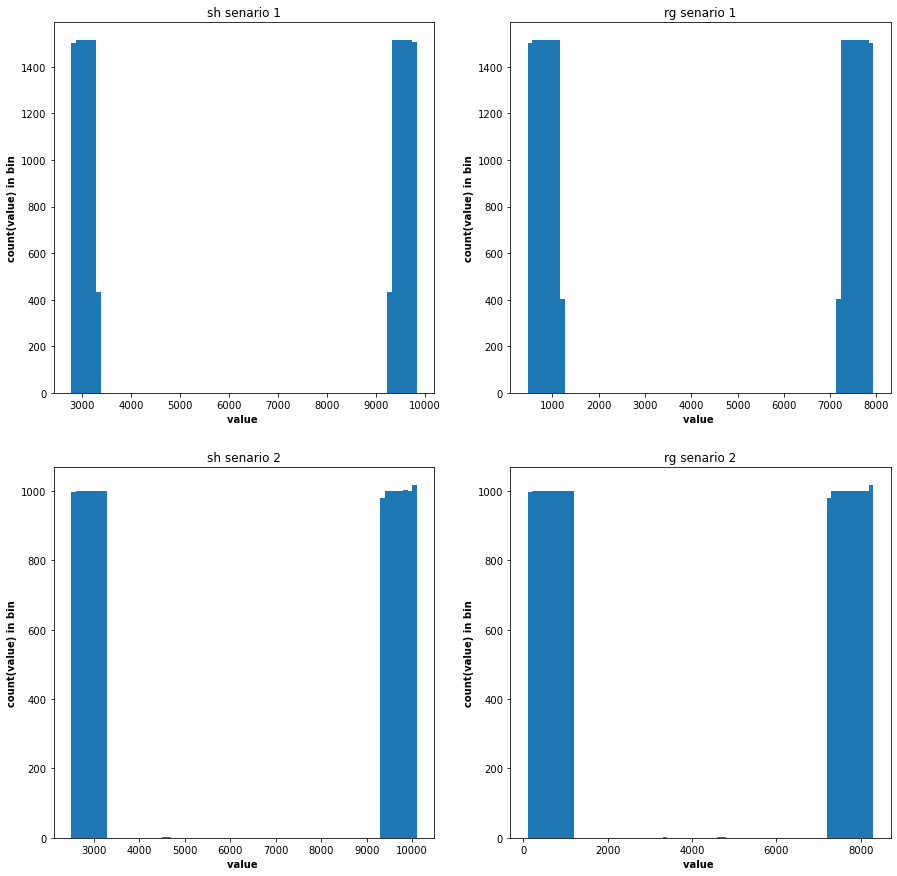

In [15]:

arr_sh_1, arr_rg_1 = get_scenario(seed=1)
arr_sh_2, arr_rg_2 = get_scenario(seed=2, jumps=20)

fig, axes = plt.subplots(2,2, )
axes[0,0].hist(arr_sh_1, bins = int((max(arr_sh_1) - min(arr_sh_1)) // 100))
axes[0,1].hist(arr_rg_1, bins = int((max(arr_rg_1) - min(arr_rg_1)) // 100))
axes[1,0].hist(arr_sh_2, bins = int((max(arr_sh_2) - min(arr_sh_2)) // 100))
axes[1,1].hist(arr_rg_2, bins = int((max(arr_rg_2) - min(arr_rg_2)) // 100))

axes[0,0].set_title("sh senario 1")
axes[0,1].set_title("rg senario 1")
axes[1,0].set_title("sh senario 2")
axes[1,1].set_title("rg senario 2")

for i in range(2):
    for j in range(2):
        axes[i,j].set_ylabel('count(value) in bin', fontweight ='bold') 
        axes[i,j].set_xlabel('value ', fontweight ='bold') 

fig.set_figheight(15)
fig.set_figwidth(15)
fig.show()

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

sh is equal 13969516.00325 > rg which is equal 11379384.359272728


<ipython-input-16-b59a1e113b7d>:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


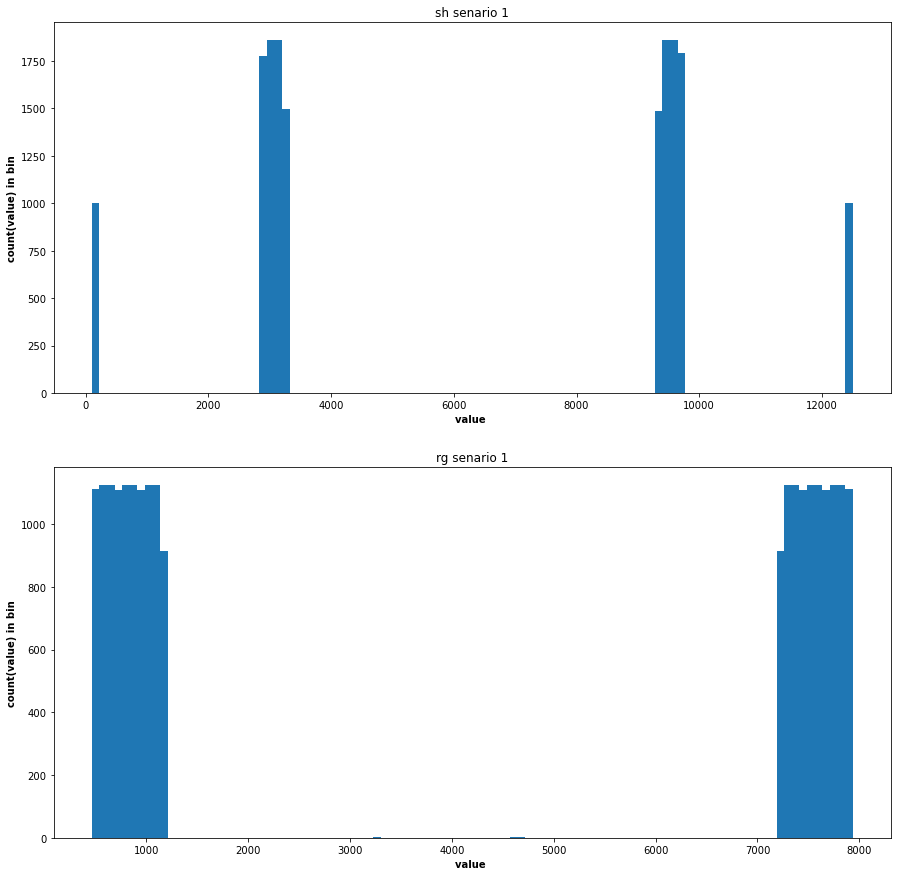

In [16]:


def variance(arr):
    
    mean = sum(arr) / len(arr)
    
    variance = 0
    
    for i in range(len(arr)):
        
        variance += pow(mean - arr[i], 2)
    
    variance /= len(arr)
    
    return variance


arr_sh, arr_rg = get_scenario(seed=1)

for i in range(1,2000, 2):
    arr_sh[-i] = 6300 - 6200
    arr_sh[-i-1] = 6300 + 6200

if check_if_disterbution_is_fine(arr_sh, arr_rg):

    vr_s = variance(arr_sh)
    vr_r = variance(arr_rg)

    print("sh is equal", vr_s, ">", "rg which is equal", vr_r)

    fig, axes = plt.subplots(2, 1, )
    axes[0].hist(arr_sh, bins=100)
    axes[1].hist(arr_rg, bins=100)

    axes[0].set_title("sh senario 1")
    axes[1].set_title("rg senario 1")

    for i in range(2):
        axes[i].set_ylabel('count(value) in bin', fontweight='bold')
        axes[i].set_xlabel('value ', fontweight='bold')

    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.show()


The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [17]:
arr_sh_rent = arr_sh_1
arr_rg_rent = arr_rg_1

def check_minimal_disterbution(dist, median, average):
 
    if sum(dist) / len(dist) != average:
        return False

    dist = sorted(dist)

    if dist[len(dist) // 2] != median :
        return False

    return True

    
arr_sh_phi = get_disterbution(14, median=12000, mean=12500, size=sh_population)
arr_rg_phi = get_disterbution(37, median=8000, mean=8500, size=rg_population, jumps=1)

if not check_minimal_disterbution(arr_sh_phi, 12000, 12500) and not check_minimal_disterbution(arr_rg_phi, 8000, 8500):
    print("Problem with Disterbution.")

arr_sh_phi = sorted(arr_sh_phi)
arr_rg_phi = sorted(arr_rg_phi)
arr_sh_rent = sorted(arr_sh_rent)
arr_rg_rent = sorted(arr_rg_rent)

def special_cov(rent, phi, alpa):

    return alpa * np.sqrt(np.var(rent)) * np.sqrt(np.var(phi))

def get_coveriance(arr1, arr2):

    return np.cov(arr1, arr2)[0,1]

special_cov_sh = special_cov(arr_sh_rent, arr_sh_phi, 0.97)
real_cov_sh = get_coveriance(arr_sh_rent, arr_sh_phi)

print("sh cov data:")
print(special_cov_sh)
print(real_cov_sh)
print(special_cov_sh / real_cov_sh)

special_cov_rg = special_cov(arr_rg_rent, arr_rg_phi, 0.89)
real_cov_rg = get_coveriance(arr_rg_rent, arr_rg_phi)

print("\n\nrg cov data:")
print(special_cov_rg)
print(real_cov_rg)
print(special_cov_rg / real_cov_rg)



sh cov data:
22443260.3166916
22345725.32383274
1.0043648166011794


rg cov data:
713147008.0139087
720008087.1840539
0.9904708304083378


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

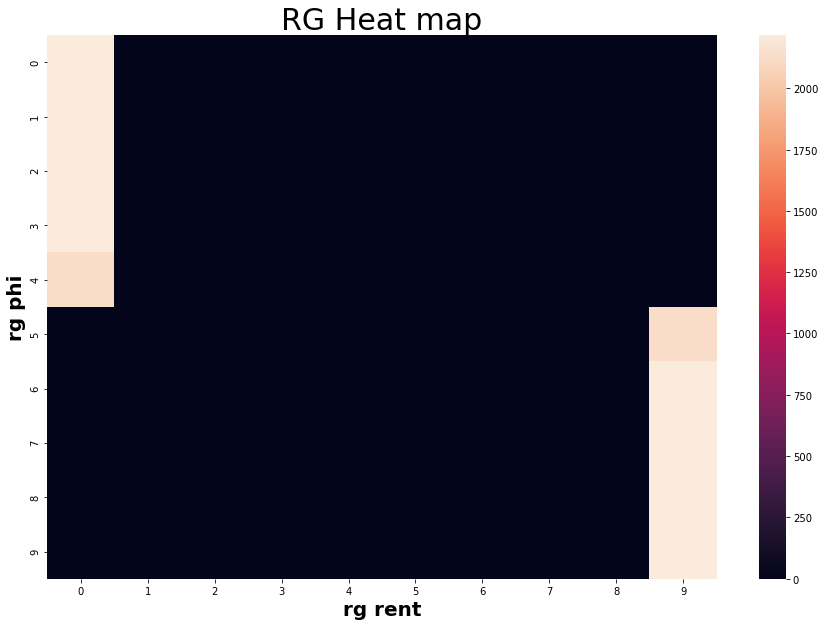

In [18]:

def get_hitmap(arr1, arr2, bins=10):
    
    return np.histogram2d(arr1, arr2, bins=bins)[0]
    
hit_map = get_hitmap(np.array(arr_rg_phi), np.array(arr_rg_rent))
    
ax = sns.heatmap(hit_map)
ax.set_title("RG Heat map", fontsize=30)
ax.set_ylabel('rg phi', fontweight ='bold', fontsize=20) 
ax.set_xlabel('rg rent', fontweight ='bold', fontsize=20) 
ax.figure.set_size_inches(15, 10)
        

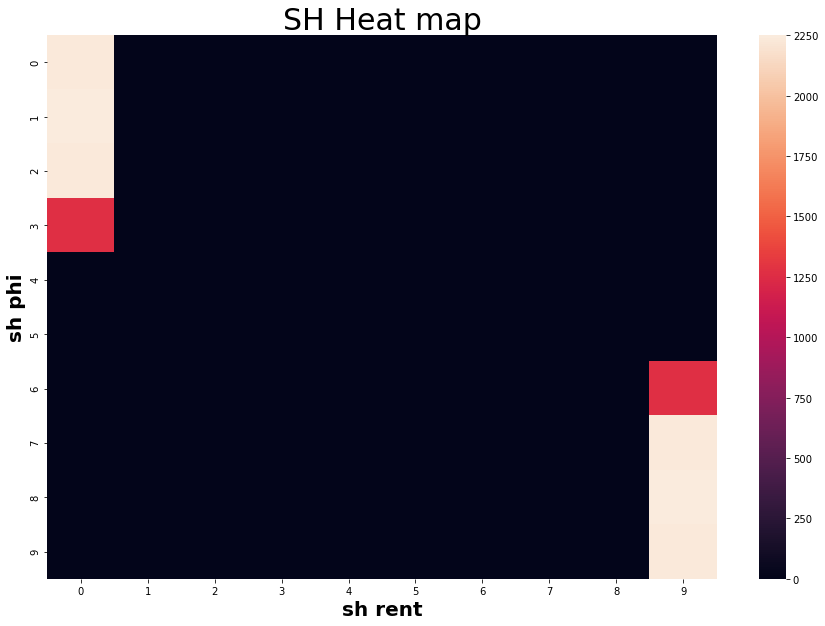

In [19]:

    
hit_map = get_hitmap(np.array(arr_sh_phi), np.array(arr_sh_rent))
    
ax = sns.heatmap(hit_map)
ax.set_title("SH Heat map", fontsize=30)
ax.set_ylabel('sh phi', fontweight ='bold', fontsize=20) 
ax.set_xlabel('sh rent', fontweight ='bold', fontsize=20) 
ax.figure.set_size_inches(15, 10)
        

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

Calculating variance of the sum of 3 random variables- X,Y,Z: \
$ Set : Q = X+Y+Z \\
Then :  Q^2 = X^2 + Y^2 + Z^2 + 2XY + 2YZ + 2XZ \\ $
$ V(X+Y+Z) = V(Q) \stackrel{\text{def}}{=} E(Q^2) - E(Q)^2 = E(X^2 + Y^2 + Z^2 + 2XY + 2YZ + 2XZ) - E(X+Y+Z)^2 \\  \stackrel{\text{lineariy of expectation}}{=}  E(X^2) + E(Y^2) + E(Z^2) +2E(XY) + 2E(YZ) + 2E(XZ) - (E(X) + E(Y) + E(Z))^2 \\  = E(X^2) + E(Y^2) + E(Z^2) +2E(XY) + 2E(YZ) + 2E(XZ) - (E(X)^2 + E(Y)^2 + E(Z)^2 + 2E(X)E(Y) + 2E(Y)E(Z) + 2E(X)E(Z))  \\ \stackrel{\text{rearanging values}}{=} 
(E(X^2)- E(X)^2) + (E(Y^2)-E(Y)^2) + (E(Z^2)-E(Z)^2) + 2((E(XY)-E(X)E(Y)) + ((E(YZ)-E(Y)E(Z)) + (E(XZ)-E(X)E(Z)) \\ = \textbf{V(X) + V(Y) + V(Z) + 2(Cov(X,Y)+Cov(Y,Z)+Cov(X,Z))} $

If any 2 random variables are independent then their covariance is 0. So if X,Y,Z are pairwise independent (each 2 pairs are independent) then: 
$ V(X+Y+Z) = V(X) + V(Y) + V(Z) $

$ \text{While: Independence} \Rightarrow \text{Pairwise independence} \\
\text{Pairwise independence} \nRightarrow \text{Independence} \\
\text{Counter example:} 
$

$ X: \{0,1\} \rightarrow [0,1],  X(0) = 1/2 , X(1) = 1/2 \\
Y : \{0,1\} \rightarrow [0,1], Y(0) = 1/2 , Y(1) = 1/2 \\
$
X and Y are independent coin tosses, Z is the probability that exactly one of the two coin tosses will land on heads. 
$ Z(0) = 1/2 \space (if X=0, Y=0 or X=1,Y=1) \space Z(1) = 1/2 \space(if X=1, Y=0 or X=0, Y=1) \\
X,Y,Z : \{(0,0,0), (0,1,1), (1,0,1), (1,1,0))\} \rightarrow [0,1], P(0,0,0) = 1/4, P(0,1,1) = 1/4, P(1,0,1) = 1/4, P(1,1,0) = 1/4 $

Its clear that X,Y are pairwise independent, being independent coin tosses. X and Z are pairwise independent because:
$ \\ P(X)*P(Z) = P(X \cap Z) \\ 
\text{Same applies for Y and Z} \\
\text{However: } P(X=0)P(Y=0)P(Z=0) = 1/2*1/2*1/2 \ne 1/4 = P(0,0,0)$

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [1]:
def NFoldConv(P, n):
    dist_Q = {}
    size_P_sigma = len(P[0]) # size of sample space
   
    if n == 0: # sum of 0 random variables shoudl return empty distribution
        return
    
    if n == 1: # returns the distribution of P
        dist_Q = dict(zip(P[0], P[1]))
        return dist_Q
    
    # In order to compute the convolution of distributions when n > 2, need to use recursion to perform the convolution on 2 entities at a time
    # For example to compute n = 4: Q = (((P1*P2)*P3)*P4), first need to convolve P1*P2 = Z then Z*P3= X then X*P4 = Q.      
    
    prev_distribution = NFoldConv(P, n-1)  
    
    for value_in_P_sigma, prob_of_value in prev_distribution.items():
        
        for i in range(size_P_sigma): # summation of values in sigma space
            if (P[0][i] + value_in_P_sigma) in dist_Q:  # if the value after summation already exists, needs to add up both probabilities
                dist_Q[(P[0][i] + value_in_P_sigma)] += P[1][i]*prob_of_value
            else:
                dist_Q[(P[0][i] + value_in_P_sigma)] = P[1][i]*prob_of_value
                
                
    return dist_Q    
            

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


$ \sigma= \{1,2,3,4,5,6,7,8\} $

$ P: \sigma \rightarrow [0,1] $

$ Q: \sigma^{17}  \rightarrow [0,1]  \\
\text{ Q = Sum of the result of rolling octahedron 17 times } $

In [16]:
P = [[i for i in range(1,9)],[1/8 for i in range(8)]]
NFoldConv(P,17)

{17: 4.440892098500626e-16,
 18: 7.549516567451064e-15,
 19: 6.794564910705958e-14,
 20: 4.303224443447107e-13,
 21: 2.1516122217235534e-12,
 22: 9.036771331238924e-12,
 23: 3.313482821454272e-11,
 24: 1.088715784192118e-10,
 25: 3.2660718574106795e-10,
 26: 9.07134811711785e-10,
 27: 2.3577291230481023e-09,
 28: 5.782673007104222e-09,
 29: 1.3473395732432891e-08,
 30: 2.998400727705075e-08,
 31: 6.401734875538523e-08,
 32: 1.3161584089260714e-07,
 33: 2.613809253482202e-07,
 34: 5.027422242953605e-07,
 35: 9.38663699212583e-07,
 36: 1.7045993589981379e-06,
 37: 3.015970226893927e-06,
 38: 5.206881849684208e-06,
 39: 8.783168114145923e-06,
 40: 1.449303744882613e-05,
 41: 2.3418493098503745e-05,
 42: 3.7090165106334894e-05,
 43: 5.762708941681183e-05,
 44: 8.790117605705916e-05,
 45: 0.00013172354057466862,
 46: 0.0001940465160554794,
 47: 0.000281171099826949,
 48: 0.00040094502474907756,
 49: 0.0005629319236253316,
 50: 0.0007785276598544222,
 51: 0.0010609964316725673,
 52: 0.001425

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [17]:
Pr = [[i for i in range(-1,4)],[0.3,0.15,0.15,0.15,0.25]]

# Distribution after 2 days
NFoldConv(Pr, 2)

{-2: 0.09,
 -1: 0.09,
 0: 0.1125,
 1: 0.135,
 2: 0.21749999999999997,
 3: 0.12,
 4: 0.0975,
 5: 0.075,
 6: 0.0625}

In [18]:
# Distribution after 5 days
NFoldConv(Pr,5)

{-5: 0.00243,
 -4: 0.006075,
 -3: 0.012149999999999998,
 -2: 0.021262499999999997,
 -1: 0.038221874999999995,
 0: 0.053738437499999986,
 1: 0.07074843749999998,
 2: 0.08720156249999998,
 3: 0.10407656249999997,
 4: 0.10719843749999998,
 5: 0.10638843749999999,
 6: 0.09968906249999998,
 7: 0.08860781249999998,
 8: 0.0683578125,
 9: 0.0517078125,
 10: 0.0363571875,
 11: 0.0233671875,
 12: 0.0120703125,
 13: 0.0064453125,
 14: 0.0029296875,
 15: 0.0009765625}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [19]:
# If Pr is the probability of gaining stock price for 1 given day and Q is the probability of gaining after 5 consecutive days:
# Then we are looking for Q[x > 7] = 1 - Q[x<= 7]
Q = NFoldConv(Pr,5)
cdf = 0
for i in range (-5,8):
    cdf += Q[i]
# Answer
1 - cdf  

print('The probability that the stock has gained strictly more than 7NIS after 5 days is: ' + str(1-cdf) )

The probability that the stock has gained strictly more than 7NIS after 5 days is: 0.20221187500000026


In [20]:
# If after 5 days the stock has stricly lost more than 4NIS, then we are looking for value < -4 (-4 is a loss of 4NIS)
# Since the most the stock could have lost was -5 among the 5 days, all we need to calculate is probability than x = -5.
Q[-5]

print('The probability that the stock has lost strictly more than 4NIS after 5 days is: ' + str(Q[-5]) )

The probability that the stock has lost strictly more than 4NIS after 5 days is: 0.00243
